In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import mode

In [2]:
import os
#data1=os.chdir("C:/Users/SUBHAM/Desktop/Python NA/part3/Python Part 3/Class 16")
os.listdir()

['.ipynb_checkpoints', 'housing.ipynb', 'housing.xlsx']

### 1. Load the data :

In [3]:
df = pd.read_excel('housing.xlsx')

In [4]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

In [5]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [49]:
X = df.drop(['median_house_value'],axis=1)
Y = df['median_house_value']

In [50]:
print(X.shape)
print(Y.shape)

(20640, 9)
(20640,)


### 2. Handle missing values :

In [51]:
X.isnull().sum()/X.count()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010131
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
dtype: float64

In [52]:
X['total_bedrooms'].mode()

0    280.0
dtype: float64

In [53]:
X['total_bedrooms'] = X['total_bedrooms'].fillna(mode(X['total_bedrooms']).mode[0])

### 3. Encode categorical data :


In [54]:
X.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
dtype: object

In [55]:
X['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [56]:
X['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [57]:
categorical_data = {'NEAR BAY':1, '<1H OCEAN':2, 'INLAND':3, 'NEAR OCEAN':4, 'ISLAND':5}

In [58]:
categorical_data

{'NEAR BAY': 1, '<1H OCEAN': 2, 'INLAND': 3, 'NEAR OCEAN': 4, 'ISLAND': 5}

In [59]:
X['ocean_proximity']=X['ocean_proximity'].map(categorical_data)

In [60]:
X.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.068831 -0.066147           -0.318710     0.925723   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
ocean_proximity      0.180381 -0.067586           -0.204882     0.014818   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068831    0.099773    0.055310      -0.015176   
latitude                 -0.066147   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.318710   -0.296244   -0.302916      -0.119034   
total_rooms               0.925723    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.871989    0.972731      -0.007511   
population                0.871989    1.000000    0.907222       0.004834   
households                0.972731    0.907222    1.000000       0.013033   
median_income            -0.007511    0.004834    0.013033       1.000000   
ocean_proximity           0.004094   -0.008511   -0.016911      -0.129135   

                    ocean_proximity  
longitude                  0.180381  
latitude                  -0.067586  
housing_median_age        -0.204882  
total_rooms                0.014818  
total_bedrooms             0.004094  
population                -0.008511  
households                -0.016911  
median_income             -0.129135  
ocean_proximity            1.000000

<AxesSubplot:>

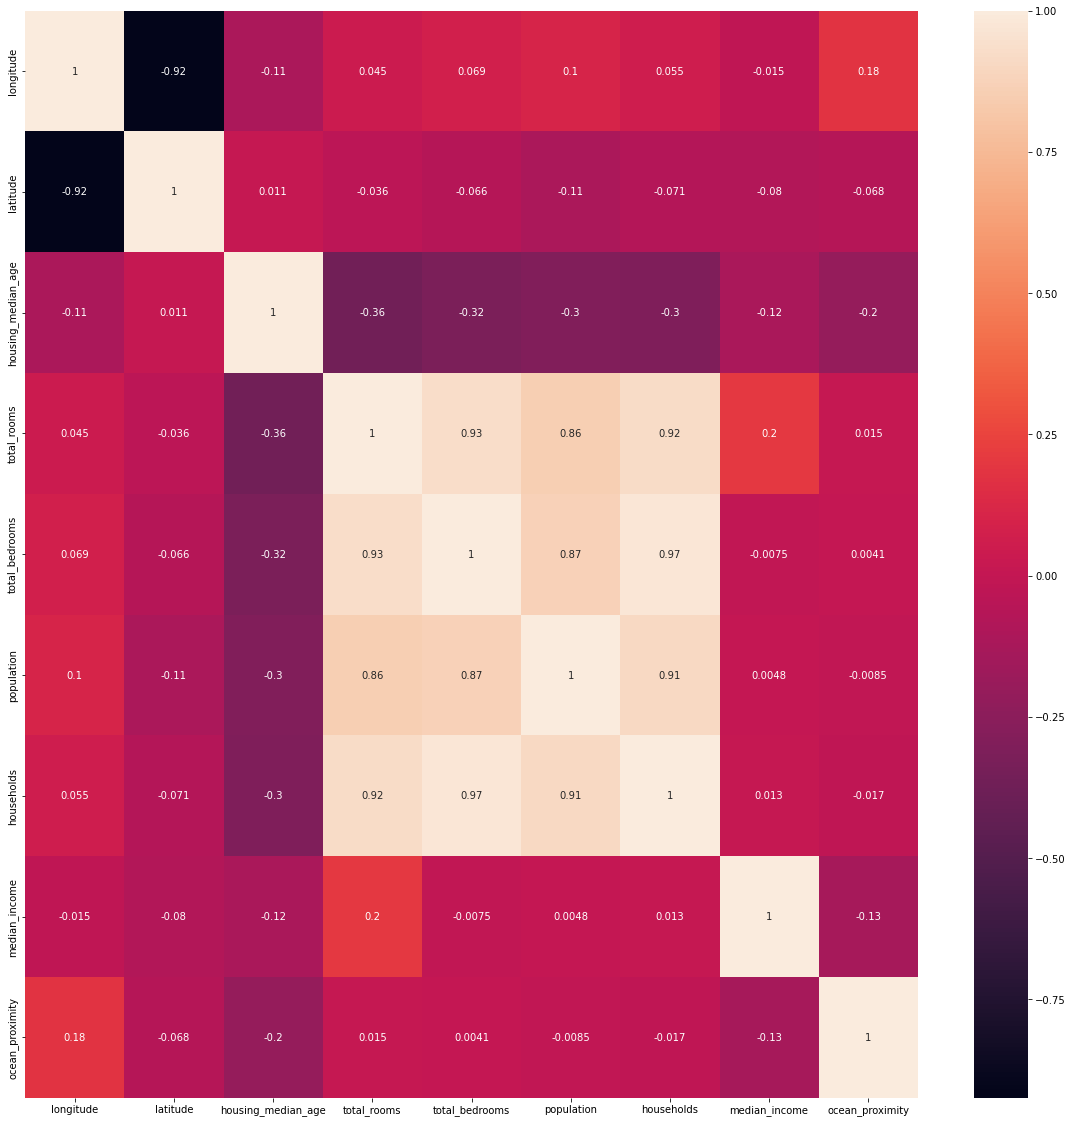

In [61]:
import seaborn as sns
corr=X.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(X[top_features].corr(),annot=True)

In [62]:
#categorical_data=df['ocean_proximity'].value_counts().to_dict()

In [63]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

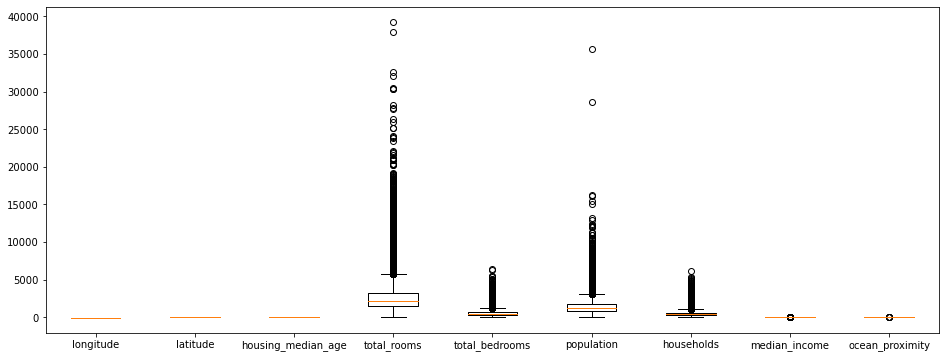

In [64]:
plt.figure(figsize=(16,6))
plt.boxplot(X)
plt.xticks((1,2,3,4,5,6,7,8,9),['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households','median_income','ocean_proximity'])
plt.show()

In [65]:
columns = ['total_rooms','total_rooms','total_bedrooms', 'population', 'households','median_income','ocean_proximity']

In [66]:
for col in columns:
    Q3 = X[col].quantile(0.75)
    Q1 = X[col].quantile(0.25)
    IQR = Q3 - Q1
    UB = Q3 + 1.5 * IQR
    LB = Q1 - 1.5 * IQR
    X[col]  =  X[col].apply(lambda x: LB if x < LB else x)
    X[col]  = X[col].apply(lambda x: UB if x > UB else x)

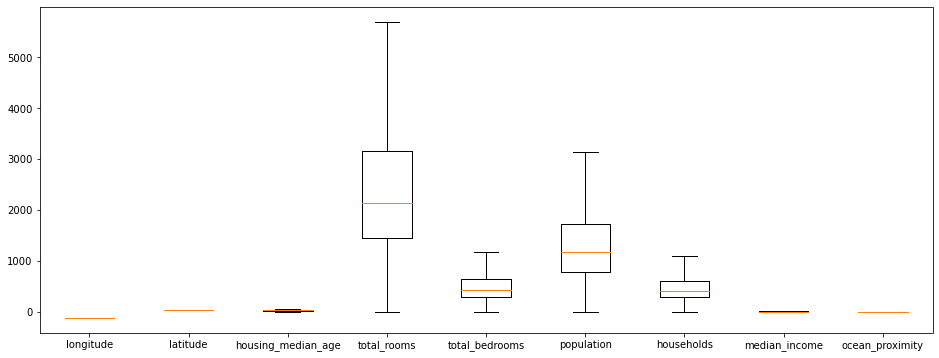

In [68]:
plt.figure(figsize=(16,6))
plt.boxplot(X)
plt.xticks((1,2,3,4,5,6,7,8,9),['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households','median_income',
       'ocean_proximity'])
plt.show()

### 4. Split the dataset : 

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=14)

In [70]:
print('X Train :',x_train.shape)
print('X Test : ',x_test.shape)
print('Y Train : ',y_train.shape)
print('Y test : ',y_test.shape)

X Train : (16512, 9)
X Test :  (4128, 9)
Y Train :  (16512,)
Y test :  (4128,)


### 5. Standardize data :

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)

In [74]:
scaler.fit(x_test)
x_test = scaler.fit_transform(x_test)

### 6. Perform Linear Regression : 

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [76]:
x_train.dtype

dtype('float64')

In [77]:
model.fit(x_train,y_train)

LinearRegression()

In [78]:
print(model.intercept_)
print(model.coef_)

207308.80414244178
[-76783.19938087 -83421.69914429  16044.68517787 -25761.18811851
  44429.58854309 -52542.86570188  37930.90619831  79691.47901211
  -1565.85227306]


In [79]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt 

In [81]:
print(sqrt(mean_squared_error(y_train, pred_train)))

68277.9599224311


In [82]:
print(sqrt(mean_squared_error(y_test, pred_test)))

66497.57558296944


In [83]:
pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(x_test)}).head(10)

Actual      Predicted
15409  162500  195082.290321
17622  238000  299368.227859
13107   91200  107186.510430
12668  109800   95729.848036
18591  350000  279429.074197
7493    97400  148810.198266
8471   180500  249784.100199
5601   165500  232766.084266
17825  257400  145378.570209
10766  455000  224157.455962

C:\Users\SUBHAM\anaconda3\envs\new_base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\SUBHAM\anaconda3\envs\new_base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

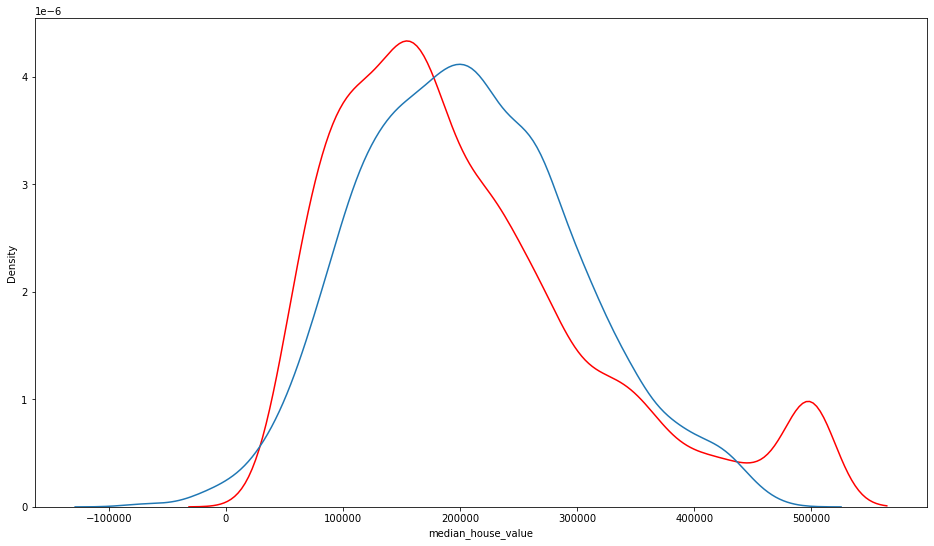

In [84]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.distplot(y_test,hist = False,color='r')
sns.distplot(model.predict(x_test),hist = False)

In [85]:
from sklearn import metrics
metrics.r2_score(y_test,pred_test)

0.6576127956856676

### 7. Bonus exercise: Perform Linear Regression with one independent variable :

In [86]:
x_bonus = X.drop(['median_income'],axis=1)
y_bonus = X.median_income

In [87]:
xtrain,xtest,ytrain,ytest = train_test_split(x_bonus,y_bonus,test_size=.2,random_state=14)

In [88]:
scaler.fit(xtrain)
scaler.fit(xtest)
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [89]:
model.fit(xtrain,ytrain)

LinearRegression()

In [90]:
pred_bo_train = model.predict(xtrain)
pred_bo_test = model.predict(xtest)

In [91]:
print(sqrt(mean_squared_error(ytrain, pred_bo_train)))

1.1271193580457823


In [92]:
print(sqrt(mean_squared_error(ytest, pred_bo_test)))

1.1686377236294792


In [93]:
pd.DataFrame({'Actual': ytest, 'Predicted': model.predict(xtest)}).head(10)

Actual  Predicted
15409  4.1316   4.637184
17622  4.9236   4.279059
13107  3.3281   3.115844
12668  2.7262   3.447507
18591  4.7188   4.163442
7493   2.4464   3.468943
8471   4.2083   3.844784
5601   4.0000   3.674487
17825  5.3400  10.073512
10766  3.2125   4.033937

In [94]:
from sklearn import metrics
metrics.r2_score(ytest,pred_bo_test)

0.5096475809291172

C:\Users\SUBHAM\anaconda3\envs\new_base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\SUBHAM\anaconda3\envs\new_base\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_income', ylabel='Density'>

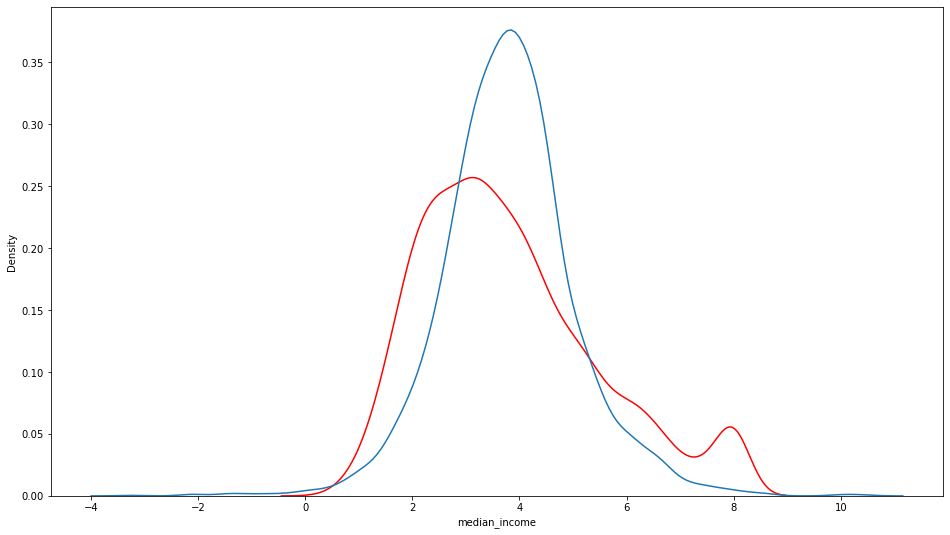

In [95]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.distplot(ytest,hist = False,color='r')
sns.distplot(model.predict(xtest),hist = False)